# 모델 훈련

* 훈련 알고리즘이 어떻게 작동하는지 잘 이해하고 있으면 적절한 모델, 올바른 훈련 알고리즘 작업에 맞는 좋은 하이퍼 파라미터를 빠르게 찾을 수 있다.
* 이 장에서 다루는 주제는 신경망(neural network)를 이해하고 구축하고 훈련시키는데 필수이다.
* 선형 회귀
    * 직접 계산할 수 있는 공식을 사용하여 훈련 세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구한다.
    * 경사 하강법(GD)라 불리는 반복적인 최적화 방식을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용함수를 훈련세트에 대해 최소화시킨다. 
    * 결국에는 앞의 방법과 동일한 파라미터로 수렴 한다.

## 선형 회귀
* 선형모델은 입력 특성의 가중치 합과 편향(bias) 또는 절편(intercept)라는 상수를 더해 예측을 만든다. 
* 모델 파라미터는 편향(상수 : x 없음)과 가중치(x_i 의 상수)를 포함한다. 
* 모델을 훈련시킨다는건 모델 파라미터를 설정 하는 것
* MSE(mean square error) 사용

 ### 정규 방정식


In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 불필요한 경고를 무시합니다 (사이파이 이슈 #5998 참조)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)             #100행 1열에 0~1사이의 랜덤값
y = 4 + 3 * X + np.random.randn(100, 1)   

그림 저장: generated_data_plot


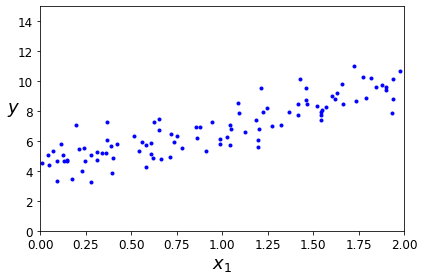

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18) # rotation y 값이 기본 90
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

식 4-4: 정규 방정식
* https://www.youtube.com/watch?v=IxAioxdgvMg

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [4]:
X_b = np.c_[np.ones((100, 1)), X]                              # 모든 샘플에 x0 = 1을 추가합니다.
X_b.shape

(100, 2)

In [5]:
y.shape

(100, 1)

In [6]:
np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).shape

(2, 100)

In [7]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best.shape

(2, 1)

* numpy선형대수 모듈 np.linalg 에 있는 inv()함수를 사용해 역행렬을 계산하고 dot() 메서드를 사용해 행렬 곱샘을 한다.
* ones() : 1로만 채워진 100by 1 크기 행렬을 만든다.
* np.c_ : 두개의 1차원 배열을 세로로 쭉 붙여서 2차원 배열 만들기
    * https://rfriend.tistory.com/352
* dot() : 두배열의 내적곱(dot product)   배열A. dot(배열B).dot(배열C) 배열 A에 B내적곱하고 C내적곱한다.
* matmul() : 행렬곱(matrix product)

In [8]:
theta_best

array([[4.21509616],
       [2.77011339]])

* 4 와 3을 기대 했지만 함수를 만들때 넣은 잡음 때문에 원래 함수의 파라미터를 재현하지 못하였다.
* $\hat{\theta}$

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [9]:
X_new = np.array([[0], [2]])             # X 의 범위 0에서 2까지
print(X_new)
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[0]
 [2]]
[[1. 0.]
 [1. 2.]]


array([[4.21509616],
       [9.75532293]])

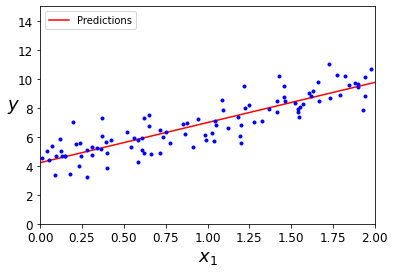

In [10]:
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18) # rotation y 값이 기본 90
plt.legend(loc="upper left", fontsize=10)
plt.show()

#### 선형 회귀 수행하기
* 특성의 가중치(coef_)와 편향 (intercept_)을 분리하여 저장한다.

In [11]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

편향과 가중치

In [12]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

직선으로 나타낼 경우 시작과 끝의 $\hat{y}$

LinearRegression 클래스는 scipy.linalg.lstsq() 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있습니다:

In [13]:
# scipy의 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 씁니다.
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print(theta_best_svd, residuals, rank, s )

[[4.21509616]
 [2.77011339]] [80.6584564] 2 [14.37020392  4.11961067]


theta_best_svd 는 해답이고, residuals 는 합계이며, 입력 A 의 행렬 랭크 를 rank 하고, s 는 A 의 특이 값 을 rank 합니다. b 차원이 두 개 이상 있으면 lstsq 가 b 각 열에 해당하는 시스템을 해결합니다.
* https://riptutorial.com/ko/numpy/example/16034/np-linalg-lstsq%EB%A5%BC-%EC%82%AC%EC%9A%A9%ED%95%98%EC%97%AC-%EC%84%A0%ED%98%95-%EC%8B%9C%EC%8A%A4%ED%85%9C%EC%97%90-%EB%8C%80%ED%95%9C-%EC%B5%9C%EC%86%8C-%EC%A0%9C%EA%B3%B1-%EC%86%94%EB%A3%A8%EC%85%98-%EC%B0%BE%EA%B8%B0

이 함수는 $\hat{\theta} = \mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 유사역행렬 (pseudoinverse)입니다
(Moore–Penrose 유사역행렬입니다). 
np.linalg.pinv()을 사용해서 유사역행렬을 직접 계산할 수 있다.

* $\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

In [14]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

* 𝐗+

#### 유사 역행렬
* 특잇값 분해(SVD)라 불리는 표준 행렬 분해 기법을 사용해 계산 된다
* 정규방정식을 계산하는 것보다 훨씬 효율적이다
* 극단적인 경우도 처리할 수 있다
    * $m < n$ 이거나 어떤 특성이 중복되어 $\mathbf{X}^T \mathbf{X}$ 의 역행렬이 없다면(특이 행렬) 정규방정식이 작동하지 않겠지만 유사역행렬은 항상 구할 수 있다.
* 계산 복잡도
    * 정규방정식은 $(n + 1) * (n + 1)$크기가되는 $\mathbf{X}^T \mathbf{X}$의 역행렬을 계산 해야 하여 일반적으로  $\mathbf{O}(n^{2.4})$ 와  $\mathbf{O}(n^{3})$ 사이다. 
    * n이 2배가 되면 8배가 증가한다.
    * SVD는 약  $\mathbf{O}(n^{2})$ 이다.
* 정규방정식과 SVD모두 특성수가 많아지면 (100'000)매우 느려진다. 
* 세트의 샘플수에 대해서는 선형적으로 증가한다.  따라서 메모리 공간이 허락된다면 큰 훈련 세트도 효율적으로 처리할 수 있다.
* 학습된 선형 회귀 모델은 예측이 매우 빠르다.
* 예측 계산 복잡도는 샘플 수와 특성 수에 선형적이다. 

## 경사 하강법 (Gradient descent)
* 비용 함수를 최소화하기 위해 반복해서 파라미터를 조정해가는 것이다.
    * 파라미터 벡터$\theta$에 대해 비용 함수의 현재 gradient를 계산한다.
    * 그리고 grad가 감소하는 방향으로 진행한다. grad가 0이되면 최솟값에 도달한 것이다.
* $\theta$를 임의의 값으로 시작해서(무작위 초기화) 한 번에 조그씩 비용 함수(MSE) 가 감소되는 방향으로 진행 한다.
* 중요한 파라미터는 step의 크기로 학습률(learning rate)하이퍼파라미터로 결정 된다.
    * 너무 작으면 시간이 오래 걸린다. 반대로 너무크면 올라가는 경우가 생길 수 있다. (발산)
* 모든 비용 함수가 매끈한 그릇과 같지는 않다. 
    * 책(166p) 무작정 왼쪽에서 시작하면 전역 최솟값(global minimum)보다 덜 좋은 지역 최솟값(local minimum)에 수렴한다.
    * 알고리즘이 오른쪽에서 시작하면 평지를 지나다가 멈추게되고 전역 최솟값에 도달하지 못하게 된다. 
* 선형 회귀를 위한 MSE 비용 함수는 볼록 함수(convex function) 이다. 즉 지역최솟값이 없고 하나의 전역 최솟값만 존재한다.
* 모든 특성이 같은 스케일을 갖도록 해야한다. 그렇지 않으면 수렴하는데 오래 걸린다. 
    * StandardScaler는 데이터의 각 특성에서 평균을 빼고 표준편차로 나눠 평균을 0으로 분산을 1로 만든다.
* 168p 의 그림 : 파라미터 공간이라고 한다. 모델이 가진 파라미터가 많을 수록 공간의 차원이 커지고 검색이 어려워 진다.

### 배치 경사 하강법
* 각 모델 파라미터 $\theta_j$에 대해 비용 함수의 grad를 계산해야 한다.
* $\theta_j$가 조금 변경될 때 비용 함수가 얼마나 바뀌는지 계산해야 한다. 이를 편도함수(partial derivative)라 한다.
식 4-6: 비용 함수의 그레이디언트 벡터

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$
* 이 공식은 매 경사 하강법 step에서 전체 훈련세트 $\mathbf{X}$에 대해 계산한다. 즉 매 step마다 훈련 데이터 전체를 사용한다.
* m이큰 훈련세트에서는 느리지만 n에 대하여는 민감하지 않다. 
* 수십만 개의 특성에서 선형 회귀를 훈련시키려면 정규 방정식이나 SVD 분해보다 경사 하강법을 사용하는것이 훨씬 더 빠른다. 

식 4-7: 경사 하강법의 스텝

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$
* 위로 향하는 grad 벡터가 구해지면 반대 방향인 아래로 가야 한다. $\theta$에서 $\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta}) $를 빼야 한다는 뜻이다.
* 여기서 학습률 $\eta$가 사용된다. 

In [15]:
eta = 0.1  # 학습률
n_iterations = 1000 #1000 번 반복
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화
print(theta)
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients #next step

[[0.01300189]
 [1.45353408]]


In [16]:
theta

array([[4.21509616],
       [2.77011339]])

* 정규 방정식으로 찾은 것과 정확히 일치한다.

In [17]:
theta_path_bgd = []                                          # 빈 배열 선언

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)           # X_b 의 길이 m = 100
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"         #처음꺼만 빨간 점선 0 에서 2범위로  1~9는 파란선
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)                 # theta_path뒤에 theta붙임
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

그림 저장: gradient_descent_plot


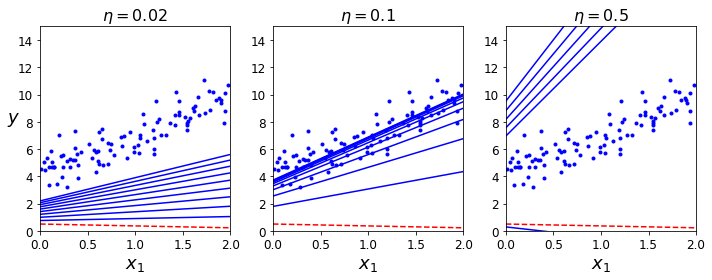

In [18]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd) # 빈 배열인 theta_path_bgd에 theta하나씩 담음
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

* 가운데가 적당한 학습률 이다. 10번 정도만에 최적점에 수렴했다. 오른쪽은 너무 높아 발산한다.
* 적절한 학습률을 찾으려면 그리드 탐색을 사용해야 한다. 하지만 수렴하는데 너무 오래 걸리는 모델을 막기 위해 반복 횟수를 제한해야 한다.
* 반복 횟수를 아주 크게 지정하고 grad 벡터가 아주 작아지면 , 즉 벡터의 노름이 어떤값 (허용오차 : tolerance)보다 작아지면 경사하강법이 거의 최소값에 도달한 것이므로 알고리즘을 중지한다.
* 중지 조건이 2개 grad가 작아지거나 횟수를 충족하거나

#### 수렴율
* 비용 함수가 볼록 함수이고 (MSE) 학습률을 고정한 배치 경사 하강법은 결국에는 수렴한다.
* 비용 함수의 모양에 따라 달라지겠지만 $\epsilon$ 범위 안에서 최적의 솔류선에 도달하기 위해서는  $\mathbf{O}(1 / \epsilon)$ 의 반복이 걸릴 수 있다.
* 허용오차 $\epsilon$ 을 1/10으로 줄이면 알고리즘의 반복은 10배 늘어난다.

### 확률적 경사 하강법
* 배경하의 가장 큰 문제는 전체 훈련세트를 사용해 m이 커지면 느려진다는 것이다. 
* 확률적 경사 하강법은 매 step에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 grad를 계산한다. 따라서 훨씬 빠르다.
* 또한 매우 큰 훈련 세트도 훈련시킬 수 있다. 
* 반면 확률(무작위)이므로 배경하 보다 훨씬 불안정하다. 부드럽게 감소하지 않고 요동치며 평균적으로 감소한다. 
* 알고리즘이 멈출 때 좋은 파라미터가 구해 지지만 최적치는 아니다. 
    * 지역 최솟값을 탈출 시켜줘 전역 최솟값을 찾을 가능성이 높다. 하지만 전역 최솟값에 다다르지 못하게된다.
* $\eta$를 점진적으로 감소 시키면 된다. 
    * 시작시 $\eta$를 크게하여 수렴을 빠르게 하고 지역 최솟값에 빠지지 않게 한다.
    * 담금질 기법(simulated annealing)알고리즘과 유사하다.
    * 매 반복에서 학습률을 결정하는 함수를 학습 스케줄(learningschedule)이라고 한다.
    * 학습률이 너무 빨리 줄면 지역 min에 같이거나 min까지 가는 중간에 멈춰버릴 수도 있다.

In [19]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

[[ 0.49671415]
 [-0.1382643 ]]
그림 저장: sgd_plot


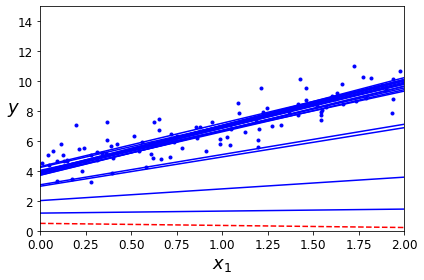

In [20]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):   # 학습률 조정 함수
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화
print(theta)
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 처음이고 i 가 0~ 19면
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"         # 처음에 처음은 빨간 점선
            plt.plot(X_new, y_predict, style)         
        random_index = np.random.randint(m)           # 0~ m-1까지 무작위 숫자 하나  
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15])                             
save_fig("sgd_plot")                                
plt.show()                                          

* 한 반복에서 (두번째 for 문) m 번 되풀이 되고 각 반복(큰 반복)을 에포크(epoch)라고 한다.
* 배경하가 1000번 하는동안 이 코드는 50번하고도 도착함

In [21]:
theta

array([[4.21076011],
       [2.74856079]])

#### CAUTION
* 확률적 경사 하강법을 할때 샘플이 IID(independent and identically distributed)를 만족해야 평균적으로 파라미터가 전역 최적점을 향해 진행한다고 보장할 수 있다. 
* 샘플을 랜덤하게 선택하거나 에포크를 시작할 때 세트를 섞는다. 
* 레이블 순서대로 정렬된 샘플처럼 샘플을 섞지 않은 채로 하면 각 레이블에 최적화 되고 두번째 레이블을 최적화 하는 방식으로 하게 될 것이다. 

* 사이킬 런에서 SGD 방식으로 선형 회귀를 하려면 SGDRegressor 클래스를 사용해야 한다.

In [22]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

* 최대 1000번 에포크 동안 실행된다. 또는 한 에포크에서 0.001보다 적게 손실이 줄어들떄까지 실행된다. 학습륙 0.1로 기본 학습 스케쥴을 사용한다. 규제는 없다. 

In [23]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.24365286]), array([2.8250878]))

### 미니배치 경사 하강법(mini-batch gradient descent)
* 각 step에서 전체 훈련 세트나 하나의 샘플을을 기반으로 grad를 계산하는 것이 아니라 미니배치라 부르는 임의의 작은 샘플 세트에 대해 grad를 계산한다. 
* 행렬 연산에 최적화된 GPU를 사용해 얻는 성능 향상을 기대할 수 있따. 
* 미니배치를 어느 정도 크게하면 이 알고리즘은 파라미터 공간에서 SGD보다 덜 불 규칙하게 움직인다. 

In [24]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
print(m)
print(np.random.permutation(m))
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

100
[30 65 64 53 45 93 91 47 10  0 18 31 88 95 77  4 80 33 12 26 98 55 22 76
 44 72 15 42 40  9 85 11 51 78 28 79  5 62 56 39 35 16 66 34  7 43 68 69
 27 19 84 25 73 49 13 24  3 17 38  8 81  6 67 36 90 83 54 50 70 46 99 61
 14 96 41 58 48 89 57 75 32 97 59 63 92 37 29  1 52 21  2 23 87 94 74 86
 82 20 60 71]


In [25]:
theta

array([[4.23707022],
       [2.77923786]])

In [26]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

그림 저장: gradient_descent_paths_plot


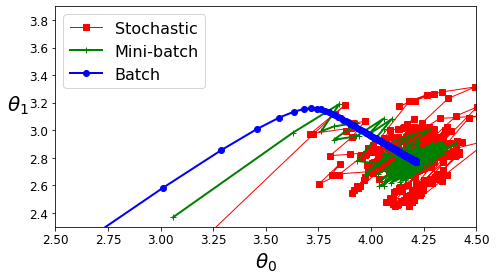

In [27]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=2, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()


* 모두 최솟값 근처에 도달했지만 배치 경사 하강법의 경로가 실제로 최솟값에서 멈춘 반면 확률적 경사 하강법과 미니배치 경사 하강법은 근처에서 매돌고 있다
* 배치는 느리지만 확률적 경사 하강법과 미니배치 경사 하강법도 적절한 학습 스케쥴을 사용하면 최솟값에 도달 한다.

## 다항 회귀(polynomial regression)
* 데이터가 단순 직선보다 복잡한 형태인 비선형 데이터를 학습하는데 선형 모델을 사용할 수 있다. 
* 각 특성의 거듭제곱을 새로운 특성으로 추가하고, 확장된 특성을 포함한 데이터넷에 선형 모델을 훈련시키는 것이다. 

### 2차 방정식(quadratic equation)

In [28]:
import numpy as np
import numpy.random as rnd

rnd.seed(42)

In [29]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

그림 저장: quadratic_data_plot


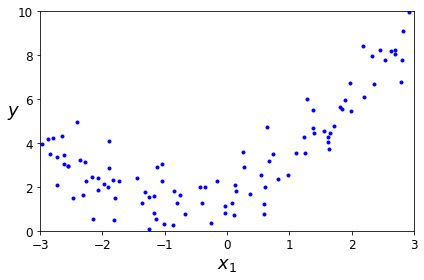

In [30]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([-3,3,0,10])
save_fig("quadratic_data_plot")
plt.show()

In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False) 
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

* PolynomialFeatures 의 dgree의 기본값은 2이고 include_bias의 기본값은 True이다. True면 편향을 위한 특성 $x_0$인 1이 추가된다.

In [32]:
X_poly[0]

array([-0.75275929,  0.56664654])

* X_poly는 원래 특성 X와 이 특성의 제곱을 포함한다. 

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

(100, 1)
(100, 2)
그림 저장: quadratic_predictions_plot


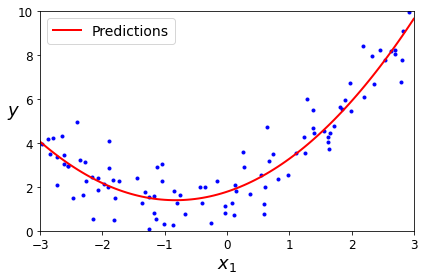

In [34]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)    # linespace (start,end,num) : 시작부터 끝을 100개의 간격으로 나눈 배열을 만들구 100*1화
print(X_new.shape)
X_new_poly = poly_features.transform(X_new)
print(X_new_poly.shape)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

* 0.5, 1.0, 2.0 , 잡음 을 기대 했고 
* 0.56, 0.93, 1.781 이 예측 되었다.

* 일반적인 선형 회귀 모델에서는 하지 못하지만 PolynomialFeatures가 주어진 차수까지 특성 간의 모든 교차항을 추가하기 때문에 찾을 수 있다. 

#### CAUTION
* PolynomialFeatures(degree = d)는 특성이 n개인 배열을 특성이 (n+3)!  /  d!n! 개인 배열로 변환한다. 
* n개의 특성에서 0부터 d개까지 뽑을 수 있는 중복 조합의 합

## 학습 곡선
* 고차 다항 회귀를 적용하면 보통의 선형 회귀에서보다 데이터에 잘 맞을 것이다. 
* 훈련 데이터에 과적홥 된다. 선형은 과소적합된다.

그림 저장: high_degree_polynomials_plot


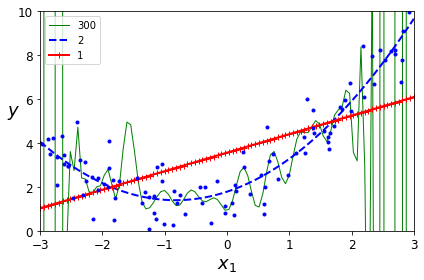

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()           
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([   # https://woolulu.tistory.com/79
            ("poly_features", polybig_features),     # 변환
            ("std_scaler", std_scaler),              # 모든 특성이같은 스케일을 가지도록 한다.
            ("lin_reg", lin_reg),                    # 학습
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

* 얼마나 복잡한 모델을 사용할지 어떻게 결정할 수 있을까?
* 2장에서는 모델의 일반화 성능을 추정하기 위해 교차 검증을 사용했다. 
    * 훈련 데이터에서 성능이 좋지만 교차 검증 점수가 나쁘다면 모델이 과적합 된것이고 양쪽다 안좋으면 과소 적합이다.
* 학습곡선을 살펴보는 방법이 있다. 
    * 훈련 세트와 검증세트의 모델 성능을 훈련 세트 크기(or 훈련 반복)의 함수로 나타낸다. 
    * 훈련 세트에서 크기가 다른 서브 세트를 만들어 모델을 여러번 훈련 시키면 된다. 

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=2, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

그림 저장: underfitting_learning_curves_plot


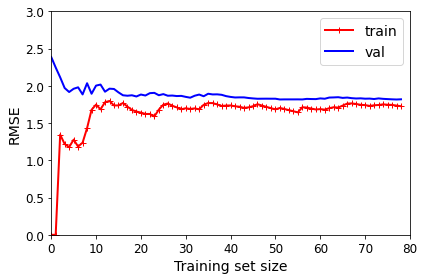

In [37]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
save_fig("underfitting_learning_curves_plot")   # 책에는 없음
plt.show()                                      # 책에는 없음

* 모델에 훈련 샘플이 추가됨에 따라 학습이 되고 검증 오차가 천천히 감소한다. 하지만 오차의 감소가 완만해져서 훈련 세트의 그래프와 가까워 진다. 
* 과소 적합 모델의 전형적인 모습
    * 두 곡선이 수평한 구간을 만들고 꽤 높은 오차에서 매우 가까이 근접해 있다. 
    * 모델이 과소 적합되어 있으면 훈련 샘플을 더 추가해도 효과가 없다.  더 복잡한 모델을 사용하거나 더 나은 특성을 선택해야 한다.

그림 저장: learning_curves_plot


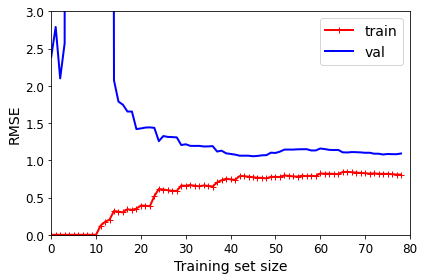

In [38]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),   # 변환
        ("lin_reg", LinearRegression()),                                         # 학습
    ]) 

plot_learning_curves(polynomial_regression, X, y)     # 모델 넣고 그리기
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot") 
plt.show()                        

* 10차 다항 회귀 모델의 학습 곡선
    * 훈련 데이터의 오차가 선형 회귀 모델보다 훨씬 낮다
    * 두 곡선 사이게 공간이 있다. 
        * 훈련 데이터에서의 모델 성능이 검증 데이터에서보다 훨씬 좋다. == 과적합
        * 더 큰 훈련세트를 사용하면 두 곡선이 점차 가까워 진다.
    

#### 과적합 모델 해결하기
* 검증 오차가 훈련오차에 근접할 때까지 더 많은 데이터를 추가한다.

#### 편향 / 분산 trade- off
* 모델의 일반화 오차는 3가지 다른 종류의 오차의 합으로 표현할 수 있다.
    * 편향
        * 일반화 오차 중에서 편향은 잘못된 가정으로 인한 것이다.
        * 데이터가 실제로는 2차인데 선형으로 가정하는 경우 
        * 편향이 큰 모델은 과소적합되기 쉽다. (선형 모델의 편향과 다르다!)
    * 분산
        * 분산(variance)은 훈련 데이터의 작은 변동에 모델이 민감하여 나타난다.
        * 자유도가 높은 모델( 고차 다항 회귀)이 높은 분산을 가지기 쉬워 훈련 데이터에 과대적합되는 경향이 있다. 
    * 줄일 수 없는 오차
        * 줄일 수 없는 오차(irreducible error)는 데이터 자체에 있는 잡음 때문에 발생한다. 
        * 데이터에서 잡음을 제거하는 수 밖에 없다. (이상치를 감지하여 제거)
* 모델의 복잡도가 커지면 통상적으로 분산이 늘어나고 편향은 줄어든다 .
* 복잡도가 줄어들면 편향이 커지고 분산이 작아진다. 

## 규제가 있는 선형 모델
* 과대적합을 감소 시키기 위한 좋은 방법은 모델을 규제하는 것이다.(모델을 제한하기)
* 자유도를 줄이면 데이터에 과대적합되기 어려워 진다.
* 다항식의 차수를 감소 시키는 것이다. 
* 선형 회귀모델에서는 모델의 가중치를 제한함으로써 규제를 가한다.

### 릿지 회귀 (ridge regression)
* 규제가 추가된 선형 회귀 버전이다.
* 규제항 $\alpha \sum\limits_{i=1}^{n}{\theta_i}^2$ 이 비용 함수에 추가된다.
    * 학습 알고리즘을 데이터에 맞춰 주면서 모델의 가중치가 가능한 작게 유지되도록 노력한다.
    * 규제항은 훈련하는 동안에만 비용 함수에 추가된다. 훈련이 끝나면 모델의 성능을 규제가 없는 성능 지표로 평가한다.
        * 규제는 비용 함수에 추가되는 것으로 test set에서 성능평가나 실제 샘플을 예측 할때는 포함되지 않는다.

#### NOTE
* 일반적으로 훈련동안 사용되는 비용함수와 테스트에서 사용되는 성능 지표는 다르다.
* 이들이 다른 이유는 훈련에 사용되는 비용 함수는 최적화를 위해 미분 가능해야 하기 때문이다. 
* 반면 테스트에 사용되는 성능 지표는 최종 목표에 한없이 가까워야 한다.
* 로그 손실 같은 비용 함수를 사용하여 훈련시킨 분류기를 정밀도/ 재현율을 사용하여 평가하는것이 좋은 예다.

* $\alpha = 0$  이면 릿지 회귀는 선형 회귀와 같아진다. 
* $\alpha$ 가 아주 크면 모든 가중치가 0에 가까워지고 데이터의 평균을 지나는 수평 선이 된다. 

$J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2$

* 편향 $\theta_0$는 규제되지 않는다. (합이 i = 1에서 시작)
* $\mathbf{w}$를 특성의 가중치 벡터($\theta_1 ~ \theta_n$)라고 정의 하면 규제항은  $\dfrac{1}{2}{||\mathbf{w}||_2}^2$ 과  같다. 
* $||\mathbf{.}||_2$가 가중치 벡터의 $l_2$노름이다. 경사 하강법에 적용하려면 MSE grad vector 에 $\alpha\mathbf{w}$를 더하면된다.

#### CAUTION
* 릿지 회귀는 입력 특성의 스케일에 민감하기 때문에 데이터의 스케일을 맞추는게 중요하다.(StandardScaler)

In [39]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [40]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [41]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

그림 저장: ridge_regression_plot


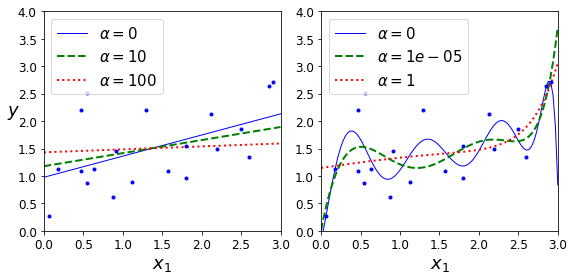

In [42]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):     # zip : alpha = alphas(0,10,100), style = ("b-", "g--", "r:")순대로 
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression() # alphas==0 LinearRegression
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha)) # label 의 r은 row string
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)                                                             # nrow , ncols , nindex
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

* 왼쪽 그래프는 평범한 릿지 모델을 사용해 선형적인 예측을 만들었따.
* 오른쪽 그래프는 PolynomialFeatures(degree=10)을 사용해 데이터를 확장하고 StandardScaler를 사용해 스케일을 조정 한후 릿지 모델을 적용 했다 .
    * 릿지 규제를 사용한 다항 회귀
    * $\alpha$를 증가 시킬수록 직선에 가까워 진다.
        * 분산을 줄지만 편향은 커진다.
* 릿지 회귀를 계산하기 위해 정규방정식을 사용할 수도 있고 경사 하강법을 사용할 수도 있다. 

$\hat\theta = (\mathbf{X}^T \mathbf{X} + \alpha\mathbf{A})^{-1}\mathbf{X}^T\mathbf{y}$

* 릿지 회귀의 정규 방정식 식 4-9
* $\mathbf{A}$는 편향에 해당하는 맨 왼쪽 위의 원소가 0 인 $(n+1)*(n+1)$의 단위 행렬(indentity matrix)이다. 
* sklearn 에서 사용하기 위해선 행렬 분해를 하여 $(\mathbf{X}^T \mathbf{X} + \alpha\mathbf{A})^{-1} = (\mathbf{L}\mathbf{L}^T) $ 로 바꾸어 성능을 올리고 계산한다. 여기서 $\mathbf{L}$은 하삼각 행렬이다.
    * Ridge의 solver 매개변수의 기본값은 'auto'이며 희소 행렬이나 특이행렬(singular matrix)이 아닐경우 'cholesky'가 된다.

In [43]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [44]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())  #  y.ravel() 평평한 1D 함수를 반환한다.
sgd_reg.predict([[1.5]])

array([1.47012588])

In [48]:
y.shape

(20, 1)

In [49]:
y.ravel().shape

(20,)

* 위는 확률적 경사 하강법을 사용 했을 때이다.
* 'penalty' 매개변수는 사용할 규제를 지정한다. "l2"는 SGD가 비용 함수에 가중치 벡터의 $l_2$노름의 제곱을 2로 나눈 (규제항)을 추가하게 한다. 즉 릿지 회귀와 같다.

### 라쏘 회귀
* 라쏘$^{least-abolute-shrinkage-and-selection-operator}$ (LASSO) 회귀는 선형 회귀의 또 다른 규제된 버전이다. 
* 비용 함수에 규제항을 더하지만 가중치 벡터의 $l_1$노름을 사용한다.

$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| $

C:\Users\Openingsound\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  model = cd_fast.enet_coordinate_descent(


그림 저장: lasso_regression_plot


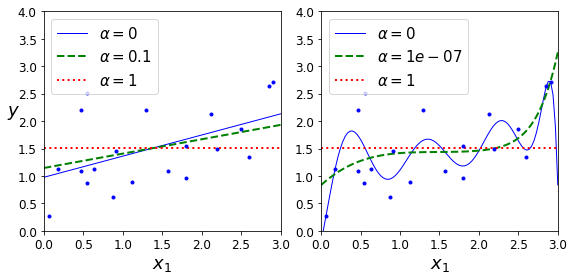

In [45]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

* 라쏘 규제를 사용한 선형회귀(왼쪽) 과 다항 회귀(오른쪽) 이다.
* 라쏘 회귀의 특징은 덜 중요한 특성의 가중치를 제거하려고 한다.(가중치가 0이 된다.)
    * 오른쪽의 $\alpha=1e^{-07}$ 점선은 2차 방정식처럼 보이며 거의 선형적이다. 차수가 높은 다항 특성의 가중치가 모두 0이되었다. 
* 라쏘 회귀는 자동으로 특성을 선택하고 희소 모델(sparse model)을 만든다.(0이 아닌 특성의 가중치가 적다.)

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [52]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

그림 저장: lasso_vs_ridge_plot


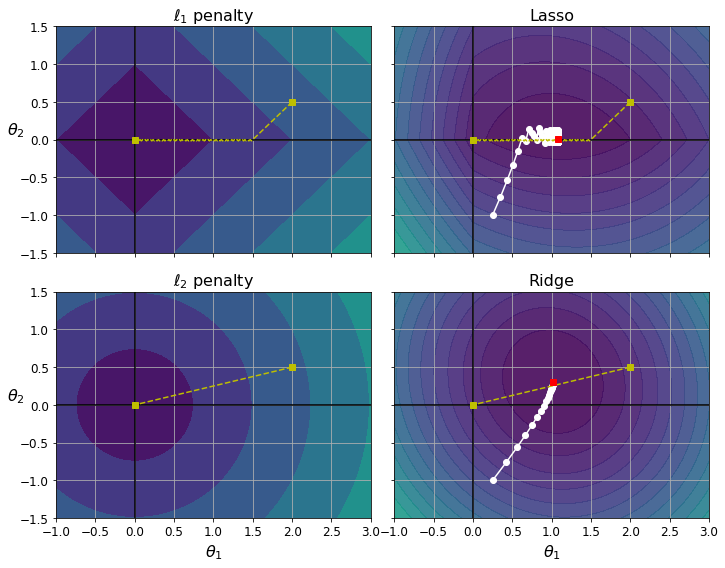

In [53]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

* 두 축은 모델 파라미터 $ \theta_1 , \theta_2$를 나타내고 배경의 등고선은 각기 다른 손실함수를 나타낸다.
* $l_1$손실은 축에 가까워 지면서 선형적으로 줄어든다.
    * $ \theta_1 , \theta_2$가 동일하게 줄어들고 $ \theta_2$ 가 먼저 0에 도달수  $ \theta_1$에 도달한다. 
    * $l_1$의 grad는 0에서 정의되지 않아 진동이 조금 있다. (이 지점에서 grad = -1 or 1)
* 우측 위 그래프의 등고선은 라쏘 loss fun을 나타낸다. ($l_1$을 더한 MSE loss fun)
    * $\alpha$를 감소하면 전역 최적점이 오른쪽으로 이동한다.
* $l_2$ 패널티를 사용하는 좌측 하단 그래프에서 $l_2$손실은 원점에 가까울수록 줄어든다.
* 우측 하단 그래프의 등고선은 릿지 회귀 비용함수를 나타낸다.  ($l_2$을 더한 MSE loss fun)
    * 라쏘와 달리 파라미터가 전역 최적점에 가까워질수록 grad 가 작아져 진동이 없이 수렴된다.
    * $\alpha$를 증가하면 전역 최적점이 오른쪽으로 이동한다.(0이 되지는 않는다.)
* 라쏘를 사용할때 경사 하강법이 최적점 근처에서 진동하는걸 막기 위해선 $\eta$를 감소 시켜야 한다.
* 라쏘의 비용함수는  $ \theta_i = 0(i =1,2,~,n일때)$에서 미분이 안된다. 하지만 $\theta_i = 0$일때 서브그레디언트 벡터$^{subgradient-vector} \mathbf{g}$를 사용하면 경사 하강법을 하는데 문제가 없다. 책 190p

In [50]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

* Lasso 대신 SGDRegressor(penalty = "l1")을 사용 할 수도 있다.

### 엘라스틱 넷(elastic net)
* 릿지와 라쏘를 절충한회귀의 모델이다. 
* 규제항은 릿지 와  라쏘항을 더해서 사용하고 혼합 정도는 혼합 비율 $r$을 사용해 조절한다.
    * $r=0$이면 릿지와 같고 $r=1$이면 라쏘 회귀와 같다.

식 4-12: 엘라스틱넷 비용 함수

$ J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2} $

### 모델 선택
* 적어도 규제가 약간 있는 것이 대부분의 경우 좋으므로 일반적으로는 평범한 선형 회귀는 피해야 한다.
* 릿지가 기본이 되지만 특성이 몇개 뿐이라면 라쏘나 엘라스틱넷이 낫다.
    * 라쏘와 엘라스틱넷은 불필요한 특성의 가중치를 0 으로 만들어 준다.
* n > m 이거나 n몇개가 강하게 연관되어 있으면 라쏘가 문제를 일으키므로 엘라스틱넷을 선호한다.

In [55]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

* ElasticNet 예제 이다. l1_ratio 가 $r$이다.

### 조기 종료$^{early-stopping}$
* 검증 에러가 $\epsilon$에 도달하면 훈련을 정지 시킨다.

In [56]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

* 50개를 반반씩 나눔

In [66]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
print(X_train.shape)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
print(X_train_poly_scaled.shape)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,   
                       #warm_start=True 면 fit()이 호출되면 처음부터가 아니라 이전 모델 파라미터에서 훈련을 이어간다.
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

(25, 1)
(25, 90)


그림 저장: early_stopping_plot


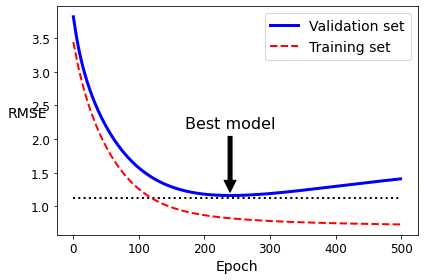

In [68]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)                        # argmin : 최소값으로 만들어주는 x를 찾아줌 개사기
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE",rotation=0, fontsize=14)
save_fig("early_stopping_plot")
plt.show()

* Epoch가 진행됨에 따라 알고리즘이 학습되어 train set 에 대한 RMSE와 val set에 대한 RMSE가 줄어든다.
* 잠시후 감소하던 val set RMSE가 멈추었다가 다시 상승한다. == 모델이 훈련 데이터에 과대적합됨
* 조기 종료는 val set RMSE가 최소에 도달하는 즉시 훈련을 멈춘다. 
    * 매우 효과적이고 간단해서 제프리 힌턴이 '훌륭한 공짜 점심'이라고 불렀다.

* 확률적 셩사 하강법이나 미니배치 경사 하강법에서는 곡선이 매끄럽지 않아 min에 도달했는지 확인이 어려울 수 있다.
* val error 가 일정 시간 동안 min보다 클때 멈추고 min모델 파라미터로 돌리는 것이 있다.

## 로지스틱 회귀$^{logistic-regression}$
* 샘플이 특정 클래스에 속할 확률을 추정하는데 사용된다. 
    * 이메일이 스팸일 확률은?
* 추정 확률이 50%가 넘으면 그 샘플이 해당 클래스에 속한다고 예측한다. (레이블이 '1'인 양성 클래스) <-> 레이블이 '0'인 음성 클래스
    * 이진 분류기

### 확률 추정
* 입력 특성의 가중치의 합을 계산한다. ( 그리고 편향을 더헌다.) 대신 바로 결과를 출력하지 않고 결과 값의 로지스틱을 출력한다.

$\hat{p} = \sigma(\theta^T\mathbf x)$

* $\hat{p}$은 샘플 $\mathbf x$가 양성 클래스에 속할 확률이다. 
* 로지스틱$\sigma$은 0과 1사이의 값을 출력하는 시그모이드 함수$^{sigmoid-function}$이다. (S자 형태)

그림 저장: logistic_function_plot


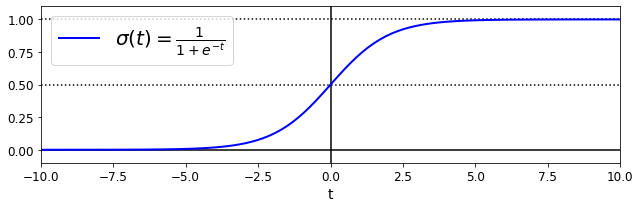

In [69]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

* 샘플 $\mathbf x$가 양성 클래스에 속할 확률 $\hat{p}$을 추정하면 예측 $\hat{y}$을 쉽게 구할 수 있다. 
* $\hat{p} < 0.5 $일때 $\hat{y} = 0$
* $\hat{p} >=0.5 $일때 $\hat{y} = 1$
* t 즉 $\theta^T\mathbf x$가 양수일때 양성 음수일때 음성 클래스라고 예측한다.

#### NOTE
* t를 종종 로쟛$^{logit}$이라고 부른다. $logit(p) = log(p / (1-p))$로 정의되는 로짓 함수가 로지스틱 함수의 역함수이다. 

### 훈련과 비용 함수
* 훈련의 목적은 모델의 파라미터 벡터 $\theta$를 찾는 것이다. 

식 4-16: 하나의 훈련 샘플에 대한 비용 함수

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) &amp; \text{if } y = 1, \\
  -\log(1 - \hat{p}) &amp; \text{if } y = 0.
\end{cases}
$


* 이 비용 함수는 t가 0에 가까워지면 $-log(t)$가 매우 커지므로 타당하다 할 수 있다. 
    * 양성 샘플을 1에 가까운 확률로 추정하면 비용이 0에 가까워진다
    * 음성 샘플을 0에 가깝게 추정하면 비용이 0에 가까워 진다.
* 전체 훈련 세트에 대한 비용 함수는 모든 훈련 샘플의 비용을 mean 한것이다. 이를 로그 손실$^{log-loss}$라 한다.    

식 4-17: 로지스틱 회귀 비용 함수(로그 손실)

$ J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]} $

* 이 비용함수의 최솟값을 계산하는 알려진 해는 없다. (정규방정식 같은거)
* 볼록 함수 이므로 경사 하강법이 전역 최솟값을 찾는걸 보장한다. ($\eta$가 크지 않고 시갆이 많다면) 
* 이 비용함수의 $\theta_j$에 대해 편미분하면 다음과 같다

식 4-18: 로지스틱 비용 함수의 편도 함수

$ \dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)} $

### 결정 경계
#### 꽃잎의 너비를 기반으로 Iris-Versicolor종을 감지하는 분류기 만들기

In [70]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [71]:
print(iris.DESCR)        # DESCR 에는 적절한 설명이 들어가 있다.

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [72]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(np.int)  # Iris virginica이면 1 아니면 0

노트: 향후 버전이 바뀌더라도 동일한 결과를 만들기 위해 사이킷런 0.22 버전의 기본값인 solver="lbfgs"로 지정합니다.

In [78]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y) # 훈련

LogisticRegression(random_state=42)

(1000, 1)
(1000, 2)
[1.66066066]
그림 저장: logistic_regression_plot


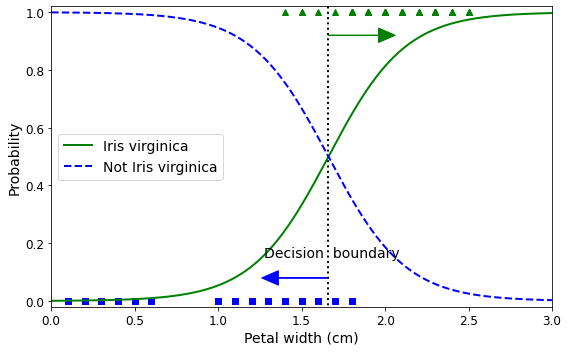

In [85]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) #0~3을 1000등분
print(X_new.shape)
y_proba = log_reg.predict_proba(X_new)          # 각 클래스에 대한 확률을 담고 있다. 
print(y_proba.shape)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0] # y_proba[:, 1] >= 0.5 인거중 첫번째 
print(decision_boundary)
plt.figure(figsize=(8, 5))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

* 꽃잎의 너비가 0~3 cm인 꽃에 대해 모델의 추정확률을 계산
* Iris-Verginica(삼각형)의 꽃잎 너비는 1.4 ~ 2.5cm에 분포하고 사각형인 다른 붓꽃은 0.1 ~ 1.8에 분포한다. 그래서 약간 중첩되는 부분이 있다.
* 2cm이상과 1cm아래는 강하게 확신하지만 사이에는 확실하지 않다.
* 어쨋든 클래스를 예측하려고 하면 (predict()사용) 가장 가능성 높은 클래스를 반활 할 것이다. 
* 따라서 1.6cm근방에 확률이 50%씩 되는 결정 경계 $^{decision-boundary}$가 만들어 진다. 

In [86]:
decision_boundary

array([1.66066066])

In [89]:
log_reg.predict([[1.7],[1.67],[1.60],[1.52], [1.5]])

array([1, 1, 0, 0, 0])

In [99]:
iris['data'].shape

(150, 4)

(150, 2)
(150,)
(200, 500) (200, 500) (100000, 2)
그림 저장: logistic_regression_contour_plot


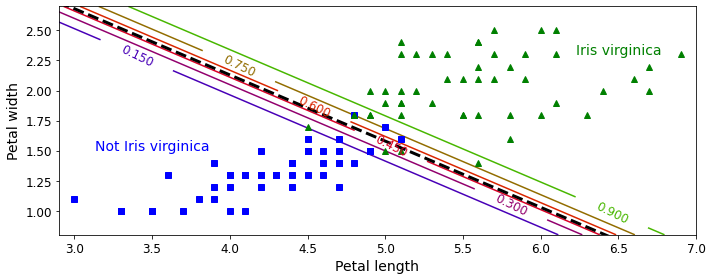

In [103]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
print(X.shape)
y = (iris["target"] == 2).astype(np.int) # int로 변환
print(y.shape)
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid( # 앞꺼와 뒤꺼로 이뤄진 모든 조합들을 만들어 준다. 
    #https://datascienceschool.net/view-notebook/17608f897087478bbeac096438c716f6/
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()] # 1000000, 인 배열 2개 만들고 이어 붙이기
print(x0.shape,x1.shape,X_new.shape)
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs") # X 의 0 번째 값이 x 1번째 값이 y
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

* 훈련이 끝나면 로지스틱 회귀 분류기가 이 두 특성을 기반으로 하여 새로운 꽃이 Iris-Verginica인지 확률을 추정 할 수 있다. 
* 점선은 모델이 50% 확률을 추정하는 지점으로 경계이다. 
* sklearn은 $l_2$페널티를 기본으로 한다. 

### 소프트맥스 회귀
* 로지스틱 회귀 모델은 여러 개의 이진 분류기를 훈련시켜 연결하지 않고 직접 다중 클래스를 지원하도록 일반화될 수 있다.
    * 이를 소프트맥스 회귀$^{softmax-regression}$ or 다항 로지스틱 회귀$^{multinomial-logistic-regression}$ 라고 한다. 
* 샘플 $\mathbf{x}$가 주어지면 먼저 소프트맥스 회귀 모델이 각 클래스 $k$에 대한 점수 $s_k(\mathbf{x})$를 계산하고 그 점수에  소프트맥스 함수 를 적용하여 각 클래스의 확률을 추정한다. 

식 4-19: 클래스 k에 대한 소프트맥스 함수

$s_k(\mathbf{x}) = (\theta^{(k)})^T \mathbf x$

* 각 클래스는 자신만의 파라미터 벡터 $\theta^{(k)}$가 있고 이 벡터들은 파라미터 행렬에 행으로 저장이 된다. 

식 4-20: 소프트맥스 함수

$ \hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}} $

* 샘플 $\mathbf x$에 대해 각 클래스의 점수가 계산되면 소프트맥스 함수를 통과시켜 클래스 k에 속할 확률 $\hat{p}_k$을 추정할 수 있다. 
* 이 함수는 각 점수에 지수 함수를 적용한 후 정규화 한다. (모든 지수함수 결과의 합으로 나눈다. ) 일반적으로 이 점수를 로짓 or 로그-오즈라 부른다. 

* $\mathbf K$는 클래스 수 이다.
* $\mathbf{s}(\mathbf{x})$는 샘플  $\mathbf x$에 대한 각 클래스의 점수를 담은 벡터이다.
* $\sigma\left(\mathbf{s}(\mathbf{x})\right)_k $는 샘플 $\mathbf x$에 대한 각 클래스의 점수가 주어 졌을 때 이 샘플이 클래스 k에 속할 추정 확률이다. 

로지스틱 회귀 분류기와 마찬가지로 소프트맥스 회귀 분류기는 추정 확률 $\hat y$이 가장 높은 클래스를 선택한다. 

식 4-11: 소포트맥스 회귀 분류기의 예측

$\hat y = $argmax$\sigma(\mathbf s(\mathbf x)))_k$ = argmax$s_k(\mathbf{x}) $

argmax 연산은 함수를 최대화 하는 변수의 값을 반환 한다.
이 식에서는 추정 확률  $\sigma\left(\mathbf{s}(\mathbf{x})\right)_k $가 최대인 $k$를 반환한다.

* 소프트 맥스 회귀  분류기는 한번에 하나의 클래스만 예측한다. 
* 종류가 다른 붓꽃 같이 상호 배타적인 클래스에서 사용해야 한다. 
* 하나의 사진에서 여러 사람의 얼굴을 인식하는데는 사용할 수 없다. 

식 4-22: 크로스 엔트로피 비용 함수

$ J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)} $

* $y_k^{(i)}$는 $i$ 번째 샘플이 클래스 $k$에 속할 타깃 확률이다. 1혹은 0 이 된다. 
* $K = 2$ 와 같이 클래스가 2개가 있으면 로지스틱 회귀의 비용함수와 같아진다. 

#### 훈련 방법
* 모델이 타깃 클래스에 대해서는 높은 확률을 추정하도록 만드는 것이 목적이다.
* 크로스 엔트로프 비용함수를 최소화 하는것은 타깃 클래스에 대해 낮은 확률을 예측하는 모델을 억제하므로 목적에 부합하다.
* 크로스 엔트로피는 추정된 클래스의 확률이 타깃 클래스에 얼마나 잘 맞는지 측정하는 용도로 사용된다. 

#### 크로스 엔트로피
* 선택 사항마다 전송한 평균 비트 수를 측정한다. 
    * 대부분의 날이 맑음이라면 맑음을 하나의  비트 (0)으로 인코딩하고 다른 7개를 (1로 시작하는) 4비트로 표현하는것이 효율적이다. 

식 4-23: 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터

$ \nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}} $

#### 소프트맥스 회귀를 사용해 붓꽃을 3개의 클래스로 분류해보기
* sklearn의 Logistic Regression은 클래스가 둘 이상일 때 기본적으로 OvA전략을 사용한다. 
* multi_class 배개변수를 "multinominal"로 바꾸면 소프트맥스 회귀를 사용할 수 있다. 
    * solver 매개변수에 "lbfgs"와 같이 소프트맥스 회귀를 지원하는 알고리즘을 지정해야 한다. 
* 기본적으로 하이퍼파라미터 C를 사용하여 조절할 수 있는 $l_2$규제가 적용된다. 

In [108]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

꽃잎의 길이가 5cm 너비가 2cm인 붗꽃을 발견했다고 가정하고 품종이 무었인지 질문하면 

In [109]:
softmax_reg.predict([[5, 2]])

array([2])

In [110]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

iris-virginica(class : 2)라고 한다. 

그림 저장: softmax_regression_contour_plot


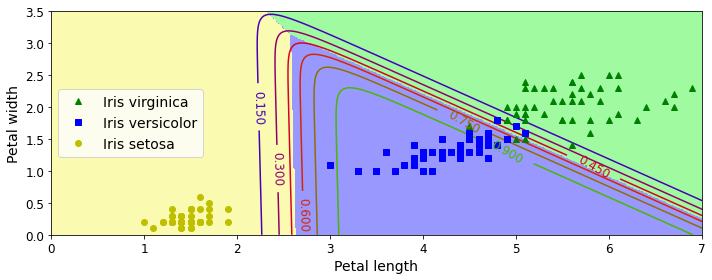

In [111]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

* 클래스 사이의 결정 경계가 모두 선형이다. 
* 클래스에 대한 확률을 곡선으로 나타냈다. 